# Meta Data Preparation 

In [2]:
import pandas as pd
Metadata_DS = pd.read_csv('C:\\24592774_Dataset_Discovery_Using_LLM\\MetaData_Creation\\Metadata_Data\\MetaData_DataSet.csv')


In [3]:
Metadata_DS.head()

,owner,id,title,description,summary,version,tags,dois,visibility,files,status,created,updated,accessLevel,versionDois,isProject,properties,license,assetStatus,dataset_url
0,makeovermonday,2023w7,2023/W7: Global Electric Vehicle Market Share,Global Electric Vehicle Market Share,"---\n{""editor"":""simple""}\n---\n## **Original V...",ecbb53fd-4a19-48f6-8479-414eb7efccd4,"['makeover monday', 'cars', 'vehicles', 'elect...",[],OPEN,[{'name': 'Global Electric Vehicle Market Shar...,LOADED,2023-01-14T22:14:41.641940969Z,2023-02-12T20:33:58.390074857Z,READ,[],False,,,,https://data.world/makeovermonday/2023w7
1,smartcolumbusos,650b7e59-afd3-4c40-9bfc-8d614610b77b,Connected Electric Autonomous Vehicle,Connected Electric Autonomous Vehicle,A rolling snapshot of data collected by the co...,fd9659bc-8303-4440-b8c6-971a63830953,['autonomous'],,OPEN,[{'name': 'ceav-route-segments-data-dictionary...,LOADED,2019-01-17T16:56:04.554Z,2019-03-04T18:36:32.927Z,READ,[],False,,CC-BY,,https://data.world/smartcolumbusos/650b7e59-af...
2,townofcary,electric-vehicle-charging-stations,Electric Vehicle Charging Stations,\n\nThis dataset contains session details from...,This dataset contains session details from pub...,0ca9d7a1-55cf-47e3-9e31-26376a607b63,"['electric vehicle', 'environment', 'energy']",[],OPEN,[{'name': 'electric-vehicle-charging-stations-...,LOADED,2022-04-24T23:45:29.582Z,2022-06-05T09:21:10.372Z,READ,[],False,,ODC-ODbL,,https://data.world/townofcary/electric-vehicle...
3,data-ny-gov,thd2-fu8y,NYSERDA Electric Vehicle Drive Clean Rebate Da...,New York State’s Charge NY initiative offers e...,*Original Title*: NYSERDA Electric Vehicle Dri...,dab0adef-3132-420e-96da-46d5ed67fd12,"['ev', 'electric vehicle', 'bev', 'phev', 'ghg...",,OPEN,[{'name': 'nyserda-electric-vehicle-drive-clea...,LOADED,2020-05-07T10:40:12.479Z,2020-10-08T07:21:12.771Z,READ,[],False,,Other,,https://data.world/data-ny-gov/thd2-fu8y
4,us-doe-gov,8ae7e117-313b-40b1-b146-83add97d400b,Impact of uncoordinated plug-in electric vehic...,Impact of uncoordinated plug-in electric vehic...,*Original Title*: Impact of uncoordinated plug...,9e507834-36e2-4cba-bddc-945248fc326a,"['battery', 'consumption', 'data', 'energy', '...",,OPEN,"[{'name': 'pev-profiles-l1-xlsx-1.xlsx', 'size...",LOADED,2018-08-27T17:28:30.547Z,2019-08-03T19:12:02.261Z,READ,[],False,,CC-BY,,https://data.world/us-doe-gov/8ae7e117-313b-40...


In [4]:
Metadata_DS = Metadata_DS[['title', 'description', 'summary', 'tags', 'files','dataset_url']]
Metadata_DS.head()

,title,description,summary,tags,files,dataset_url
0,2023/W7: Global Electric Vehicle Market Share,Global Electric Vehicle Market Share,"---\n{""editor"":""simple""}\n---\n## **Original V...","['makeover monday', 'cars', 'vehicles', 'elect...",[{'name': 'Global Electric Vehicle Market Shar...,https://data.world/makeovermonday/2023w7
1,Connected Electric Autonomous Vehicle,Connected Electric Autonomous Vehicle,A rolling snapshot of data collected by the co...,['autonomous'],[{'name': 'ceav-route-segments-data-dictionary...,https://data.world/smartcolumbusos/650b7e59-af...
2,Electric Vehicle Charging Stations,\n\nThis dataset contains session details from...,This dataset contains session details from pub...,"['electric vehicle', 'environment', 'energy']",[{'name': 'electric-vehicle-charging-stations-...,https://data.world/townofcary/electric-vehicle...
3,NYSERDA Electric Vehicle Drive Clean Rebate Da...,New York State’s Charge NY initiative offers e...,*Original Title*: NYSERDA Electric Vehicle Dri...,"['ev', 'electric vehicle', 'bev', 'phev', 'ghg...",[{'name': 'nyserda-electric-vehicle-drive-clea...,https://data.world/data-ny-gov/thd2-fu8y
4,Impact of uncoordinated plug-in electric vehic...,Impact of uncoordinated plug-in electric vehic...,*Original Title*: Impact of uncoordinated plug...,"['battery', 'consumption', 'data', 'energy', '...","[{'name': 'pev-profiles-l1-xlsx-1.xlsx', 'size...",https://data.world/us-doe-gov/8ae7e117-313b-40...


In [5]:
import ast

# String format to list
Metadata_DS['files'] = Metadata_DS['files'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Function to extract formats
def extract_formats(files):
    formats = set()
    if isinstance(files, list):
        for file in files:
            if isinstance(file, dict) and 'name' in file:
                filename = file['name']
                file_format = filename.split('.')[-1]
                formats.add(file_format)
    return list(formats)

# Apply Function and extract the formats
Metadata_DS['available_formats'] = Metadata_DS['files'].apply(extract_formats)

In [6]:
Metadata_DS.drop(columns=['files'], inplace=True)


In [7]:
Metadata_DS.head()

,title,description,summary,tags,dataset_url,available_formats
0,2023/W7: Global Electric Vehicle Market Share,Global Electric Vehicle Market Share,"---\n{""editor"":""simple""}\n---\n## **Original V...","['makeover monday', 'cars', 'vehicles', 'elect...",https://data.world/makeovermonday/2023w7,[xlsx]
1,Connected Electric Autonomous Vehicle,Connected Electric Autonomous Vehicle,A rolling snapshot of data collected by the co...,['autonomous'],https://data.world/smartcolumbusos/650b7e59-af...,[csv]
2,Electric Vehicle Charging Stations,\n\nThis dataset contains session details from...,This dataset contains session details from pub...,"['electric vehicle', 'environment', 'energy']",https://data.world/townofcary/electric-vehicle...,"[dbf, csv, shx, shp, json, prj]"
3,NYSERDA Electric Vehicle Drive Clean Rebate Da...,New York State’s Charge NY initiative offers e...,*Original Title*: NYSERDA Electric Vehicle Dri...,"['ev', 'electric vehicle', 'bev', 'phev', 'ghg...",https://data.world/data-ny-gov/thd2-fu8y,[csv]
4,Impact of uncoordinated plug-in electric vehic...,Impact of uncoordinated plug-in electric vehic...,*Original Title*: Impact of uncoordinated plug...,"['battery', 'consumption', 'data', 'energy', '...",https://data.world/us-doe-gov/8ae7e117-313b-40...,[xlsx]


#### Data Cleaning 

1. Null Values

In [8]:
Metadata_DS.fillna('', inplace=True)


2. Data Transformation

2.1 Data Normalization

In [9]:
Metadata_DS['title']                = Metadata_DS['title'].str.lower()
Metadata_DS['description']          = Metadata_DS['description'].str.lower()
Metadata_DS['summary']              = Metadata_DS['summary'].str.lower()
Metadata_DS['tags']                 = Metadata_DS['tags'].str.lower()


In [10]:
Metadata_DS.head()

,title,description,summary,tags,dataset_url,available_formats
0,2023/w7: global electric vehicle market share,global electric vehicle market share,"---\n{""editor"":""simple""}\n---\n## **original v...","['makeover monday', 'cars', 'vehicles', 'elect...",https://data.world/makeovermonday/2023w7,[xlsx]
1,connected electric autonomous vehicle,connected electric autonomous vehicle,a rolling snapshot of data collected by the co...,['autonomous'],https://data.world/smartcolumbusos/650b7e59-af...,[csv]
2,electric vehicle charging stations,\n\nthis dataset contains session details from...,this dataset contains session details from pub...,"['electric vehicle', 'environment', 'energy']",https://data.world/townofcary/electric-vehicle...,"[dbf, csv, shx, shp, json, prj]"
3,nyserda electric vehicle drive clean rebate da...,new york state’s charge ny initiative offers e...,*original title*: nyserda electric vehicle dri...,"['ev', 'electric vehicle', 'bev', 'phev', 'ghg...",https://data.world/data-ny-gov/thd2-fu8y,[csv]
4,impact of uncoordinated plug-in electric vehic...,impact of uncoordinated plug-in electric vehic...,*original title*: impact of uncoordinated plug...,"['battery', 'consumption', 'data', 'energy', '...",https://data.world/us-doe-gov/8ae7e117-313b-40...,[xlsx]


2.2 Data Transformation

In [11]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    return filtered_tokens

# Apply preprocessing to each column (title, description, summary) in the DataFrame
Metadata_DS['title'] = Metadata_DS['title'].apply(preprocess_text)
Metadata_DS['description'] = Metadata_DS['description'].apply(preprocess_text)
Metadata_DS['summary'] = Metadata_DS['summary'].apply(preprocess_text)

# Display the preprocessed DataFrame
print(Metadata_DS.head())


                                               title  \
0  [2023w7, global, electric, vehicle, market, sh...   
1         [connected, electric, autonomous, vehicle]   
2            [electric, vehicle, charging, stations]   
3  [nyserda, electric, vehicle, drive, clean, reb...   
4  [impact, uncoordinated, plugin, electric, vehi...   

                                         description  \
0         [global, electric, vehicle, market, share]   
1         [connected, electric, autonomous, vehicle]   
2  [dataset, contains, session, details, publicly...   
3  [new, york, state, ’, charge, ny, initiative, ...   
4  [impact, uncoordinated, plugin, electric, vehi...   

                                             summary  \
0  [editorsimple, original, visualization, httpsm...   
1  [rolling, snapshot, data, collected, connected...   
2  [dataset, contains, session, details, publicly...   
3  [original, title, nyserda, electric, vehicle, ...   
4  [original, title, impact, uncoordinated, pl

In [12]:
Metadata_DS.to_csv("Prepared_MetaData_DataSet.csv", index=False)


In [13]:
Enrich_Metadata_DS = Metadata_DS.copy()

3.1 Keyword Extraction

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

#  Combine the fields to form a corpus
corpus = [(str(title) + ' ' + str(description) + ' ' + str(summary)) for title, description, summary in zip(Enrich_Metadata_DS['title'], Enrich_Metadata_DS['description'], Enrich_Metadata_DS['summary'])]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=50, stop_words='english')
X = vectorizer.fit_transform(corpus)

# Extract the top keywords for each entry
keywords = vectorizer.get_feature_names_out()
Enrich_Metadata_DS['initial_tags'] = [', '.join([keywords[i] for i in X[j].nonzero()[1]]) for j in range(X.shape[0])]


In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to refine keywords
def refine_keywords(keywords):
    keywords = keywords.split(', ')
    refined = [lemmatizer.lemmatize(word) for word in keywords if word not in stop_words]
    return ', '.join(refined)

# Apply refinement
Enrich_Metadata_DS['initial_tags'] = Enrich_Metadata_DS['initial_tags'].apply(refine_keywords)


[nltk_data] Downloading package stopwords to C:\Users\Steffi
[nltk_data]     Grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Steffi
[nltk_data]     Grace\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
Enrich_Metadata_DS.head()

,title,description,summary,tags,dataset_url,available_formats,initial_tags
0,"[2023w7, global, electric, vehicle, market, sh...","[global, electric, vehicle, market, share]","[editorsimple, original, visualization, httpsm...","['makeover monday', 'cars', 'vehicles', 'elect...",https://data.world/makeovermonday/2023w7,[xlsx],"source, data, original, vehicle, electric"
1,"[connected, electric, autonomous, vehicle]","[connected, electric, autonomous, vehicle]","[rolling, snapshot, data, collected, connected...",['autonomous'],https://data.world/smartcolumbusos/650b7e59-af...,[csv],"updated, available, including, vehicle, collec..."
2,"[electric, vehicle, charging, stations]","[dataset, contains, session, details, publicly...","[dataset, contains, session, details, publicly...","['electric vehicle', 'environment', 'energy']",https://data.world/townofcary/electric-vehicle...,"[dbf, csv, shx, shp, json, prj]","dataset, charging, updated, available, source,..."
3,"[nyserda, electric, vehicle, drive, clean, reb...","[new, york, state, ’, charge, ny, initiative, ...","[original, title, nyserda, electric, vehicle, ...","['ev', 'electric vehicle', 'bev', 'phev', 'ghg...",https://data.world/data-ny-gov/thd2-fu8y,[csv],"service, using, use, information, research, sa..."
4,"[impact, uncoordinated, plugin, electric, vehi...","[impact, uncoordinated, plugin, electric, vehi...","[original, title, impact, uncoordinated, plugi...","['battery', 'consumption', 'data', 'energy', '...",https://data.world/us-doe-gov/8ae7e117-313b-40...,[xlsx],"total, number, al, united, using, use, chargin..."


In [32]:
domain = {
    'pollution', 'environment', 'air-quality','hospital', 
    'healthcare', 'medical', 'clinical', 'medicine','social_sciences','social', 
    'sociology', 'psychology', 'behavior','finance', 'economy', 'financial', 
    'investment', 'money','technology', 'tech', 'innovation', 'digital', 'IT',
    'engineering', 'mechanical', 'civil', 'electrical', 'structural',
    'food', 'nutrition', 'agriculture', 'diet', 'culinary',
    'arts', 'culture', 'music', 'creative', 'painting',
    'sports', 'athletics', 'fitness', 'recreation', 'exercise'
}

In [33]:
# Function to augment keywords
def augment_keywords(refined_tags):
    tags = set(refined_tags.split(', '))
    tags.update(domain.intersection(tags))  # Add domain terms if they are relevant
    return ', '.join(tags)

# Apply augmentation
Enrich_Metadata_DS['augmented_tags'] = Enrich_Metadata_DS['initial_tags'].apply(augment_keywords)

In [34]:
Enrich_Metadata_DS.head()

,title,description,summary,tags,dataset_url,available_formats,initial_tags,augmented_tags
0,"[2023w7, global, electric, vehicle, market, sh...","[global, electric, vehicle, market, share]","[editorsimple, original, visualization, httpsm...","['makeover monday', 'cars', 'vehicles', 'elect...",https://data.world/makeovermonday/2023w7,[xlsx],"source, data, original, vehicle, electric","original, electric, source, data, vehicle"
1,"[connected, electric, autonomous, vehicle]","[connected, electric, autonomous, vehicle]","[rolling, snapshot, data, collected, connected...",['autonomous'],https://data.world/smartcolumbusos/650b7e59-af...,[csv],"updated, available, including, vehicle, collec...","electric, source, data, available, including, ..."
2,"[electric, vehicle, charging, stations]","[dataset, contains, session, details, publicly...","[dataset, contains, session, details, publicly...","['electric vehicle', 'environment', 'energy']",https://data.world/townofcary/electric-vehicle...,"[dbf, csv, shx, shp, json, prj]","dataset, charging, updated, available, source,...","electric, source, available, dataset, vehicle,..."
3,"[nyserda, electric, vehicle, drive, clean, reb...","[new, york, state, ’, charge, ny, initiative, ...","[original, title, nyserda, electric, vehicle, ...","['ev', 'electric vehicle', 'bev', 'phev', 'ghg...",https://data.world/data-ny-gov/thd2-fu8y,[csv],"service, using, use, information, research, sa...","original, electric, new, source, research, use..."
4,"[impact, uncoordinated, plugin, electric, vehi...","[impact, uncoordinated, plugin, electric, vehi...","[original, title, impact, uncoordinated, plugi...","['battery', 'consumption', 'data', 'energy', '...",https://data.world/us-doe-gov/8ae7e117-313b-40...,[xlsx],"total, number, al, united, using, use, chargin...","original, number, source, electric, use, data,..."


In [ ]:
Enrich_Metadata_DS.h

In [36]:
from transformers import pipeline

# Initialize NER pipeline
ner = pipeline("ner")

# Function to extract entities
def extract_entities(text):
    entities = ner(text)
    return ', '.join(set([entity['word'] for entity in entities if entity['entity'].startswith('B-')]))

# Apply NER on combined text fields
Enrich_Metadata_DS['ner_tags'] = (Enrich_Metadata_DS['title'].astype(str) + ' ' + Enrich_Metadata_DS['description'].astype(str) + ' ' + Enrich_Metadata_DS['summary'].astype(str)).apply(extract_entities)

# Combine with augmented tags
Enrich_Metadata_DS['final_tags'] = Enrich_Metadata_DS.apply(lambda row: ', '.join(set(row['augmented_tags'].split(', ') + row['ner_tags'].split(', '))), axis=1)


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
Enrich_Metadata_DS.head()

,title,description,summary,tags,dataset_url,available_formats,initial_tags,augmented_tags,ner_tags,final_tags
0,"[2023w7, global, electric, vehicle, market, sh...","[global, electric, vehicle, market, share]","[editorsimple, original, visualization, httpsm...","['makeover monday', 'cars', 'vehicles', 'elect...",https://data.world/makeovermonday/2023w7,[xlsx],"source, data, original, vehicle, electric","original, electric, source, data, vehicle",,"original, electric, source, , data, vehicle"
1,"[connected, electric, autonomous, vehicle]","[connected, electric, autonomous, vehicle]","[rolling, snapshot, data, collected, connected...",['autonomous'],https://data.world/smartcolumbusos/650b7e59-af...,[csv],"updated, available, including, vehicle, collec...","electric, source, data, available, including, ...",,"electric, , source, data, available, including..."
2,"[electric, vehicle, charging, stations]","[dataset, contains, session, details, publicly...","[dataset, contains, session, details, publicly...","['electric vehicle', 'environment', 'energy']",https://data.world/townofcary/electric-vehicle...,"[dbf, csv, shx, shp, json, prj]","dataset, charging, updated, available, source,...","electric, source, available, dataset, vehicle,...",,"electric, , source, available, dataset, vehicl..."
3,"[nyserda, electric, vehicle, drive, clean, reb...","[new, york, state, ’, charge, ny, initiative, ...","[original, title, nyserda, electric, vehicle, ...","['ev', 'electric vehicle', 'bev', 'phev', 'ghg...",https://data.world/data-ny-gov/thd2-fu8y,[csv],"service, using, use, information, research, sa...","original, electric, new, source, research, use...",,"original, electric, new, source, research, use..."
4,"[impact, uncoordinated, plugin, electric, vehi...","[impact, uncoordinated, plugin, electric, vehi...","[original, title, impact, uncoordinated, plugi...","['battery', 'consumption', 'data', 'energy', '...",https://data.world/us-doe-gov/8ae7e117-313b-40...,[xlsx],"total, number, al, united, using, use, chargin...","original, number, source, electric, use, data,...",,"original, number, source, electric, use, data,..."


In [47]:
Enrich_Metadata_DS.to_csv("Enriched_MetaData_DataSet.csv", index=False)


In [48]:
# Function to extract entities
def extract_entities(text):
    entities = ner(text)
    return ', '.join(set([entity['word'] for entity in entities if entity['entity'].startswith('B-')]))

# Apply NER on combined text fields
Enrich_Metadata_DS['ner_tags'] = (Enrich_Metadata_DS['title'].astype(str) + ' ' + Enrich_Metadata_DS['description'].astype(str) + ' ' + Enrich_Metadata_DS['summary'].astype(str)).apply(lambda text: extract_entities(str(text)))

# Combine with augmented tags
Enrich_Metadata_DS['final_tags'] = Enrich_Metadata_DS.apply(lambda row: ', '.join(set(row['augmented_tags'].split(', ') + row['ner_tags'].split(', '))), axis=1)


In [49]:
# Display tags for manual review
for index, row in Enrich_Metadata_DS.iterrows():
    print(f"Dataset {index}: {row['final_tags']}")
    # Here you can add code to manually edit tags if necessary


Dataset 0: original, electric, source, , data, vehicle
Dataset 1: electric, , source, data, available, including, collected, vehicle, updated
Dataset 2: electric, , source, available, dataset, vehicle, updated, charging
Dataset 3: original, electric, new, source, research, use, data, , information, dataset, service, sale, vehicle, updated, using
Dataset 4: original, number, source, electric, use, data, , available, united, vehicle, updated, charging, total, al, using
Dataset 5: vehicle, , electric
Dataset 6: original, number, source, electric, use, data, , available, united, vehicle, updated, charging, total, al, using
Dataset 7: electric, , source, available, vehicle, updated
Dataset 8: electric, , source, data, collected, vehicle, updated, charging, using
Dataset 9: electric, , data, public, dataset, vehicle, charging
Dataset 10: electric, , source, data, information, dataset, vehicle, updated, charging
Dataset 11: electric, , new, data, including, vehicle, charging
Dataset 12: elect

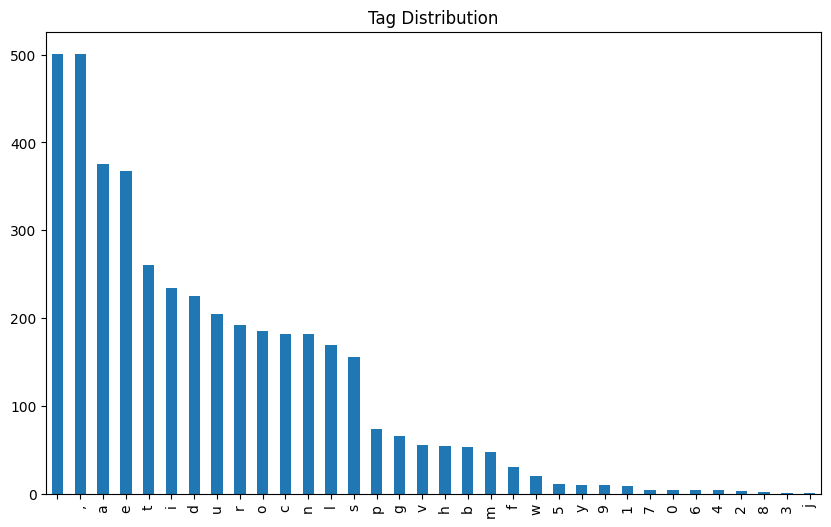

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final_tags' is the column containing tags in your DataFrame
# No need to split the 'final_tags' column as it's already a list
# Convert 'final_tags' column to list of lists (splitting by comma)
# Enrich_Metadata_DS['final_tags'] = Enrich_Metadata_DS['final_tags'].apply(lambda x: x.split(','))

# Flatten the list of lists to get all tags
all_tags = [tag.strip() for sublist in Enrich_Metadata_DS['final_tags'] for tag in sublist]

# Count the frequency of each tag
tag_counts = pd.Series(all_tags).value_counts()

# Visualize the distribution of tag frequencies
tag_counts.plot(kind='bar', figsize=(10, 6), title='Tag Distribution')
plt.show()


In [51]:
plt.show()


3. Data Indexing

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

Index_Metadata_DS = Metadata_DS.copy()

# Concatenate text from title, description, and summary columns into a single column
Index_Metadata_DS['text'] = Index_Metadata_DS['title'] + Index_Metadata_DS['description'] + Index_Metadata_DS['summary']

# Convert the combined_text column into a list of strings
corpus = [' '.join(text) for text in Index_Metadata_DS['text']]

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to create the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Print the shape of the TF-IDF matrix and the list of features (words)
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)
print("List of features (words):", vectorizer.get_feature_names_out())


Shape of TF-IDF matrix: (84, 3456)
List of features (words): ['000' '0000001' '00971525196596' ...
 'zipcodedatacsvhttpsdataworldnrippnercancertrialsfilezipcodedatacsv'
 'éesnones' '彡abortion']


In [53]:
# Convert the TF-IDF matrix to a DataFrame
index = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original dataset
Index_Metadata_DS = pd.concat([Index_Metadata_DS, index], axis=1)


In [54]:
Index_Metadata_DS.head()

,title,description,summary,tags,dataset_url,available_formats,text,000,0000001,00971525196596,...,youre,youth,youtube,youve,zambia,zero,zip,zipcodedatacsvhttpsdataworldnrippnercancertrialsfilezipcodedatacsv,éesnones,彡abortion
0,"[2023w7, global, electric, vehicle, market, sh...","[global, electric, vehicle, market, share]","[editorsimple, original, visualization, httpsm...","['makeover monday', 'cars', 'vehicles', 'elect...",https://data.world/makeovermonday/2023w7,[xlsx],"[2023w7, global, electric, vehicle, market, sh...",0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[connected, electric, autonomous, vehicle]","[connected, electric, autonomous, vehicle]","[rolling, snapshot, data, collected, connected...",['autonomous'],https://data.world/smartcolumbusos/650b7e59-af...,[csv],"[connected, electric, autonomous, vehicle, con...",0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[electric, vehicle, charging, stations]","[dataset, contains, session, details, publicly...","[dataset, contains, session, details, publicly...","['electric vehicle', 'environment', 'energy']",https://data.world/townofcary/electric-vehicle...,"[dbf, csv, shx, shp, json, prj]","[electric, vehicle, charging, stations, datase...",0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[nyserda, electric, vehicle, drive, clean, reb...","[new, york, state, ’, charge, ny, initiative, ...","[original, title, nyserda, electric, vehicle, ...","['ev', 'electric vehicle', 'bev', 'phev', 'ghg...",https://data.world/data-ny-gov/thd2-fu8y,[csv],"[nyserda, electric, vehicle, drive, clean, reb...",0.0,0.0,0.0,...,0.0,0.0,0.067036,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[impact, uncoordinated, plugin, electric, vehi...","[impact, uncoordinated, plugin, electric, vehi...","[original, title, impact, uncoordinated, plugi...","['battery', 'consumption', 'data', 'energy', '...",https://data.world/us-doe-gov/8ae7e117-313b-40...,[xlsx],"[impact, uncoordinated, plugin, electric, vehi...",0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
Index_Metadata_DS.to_csv("Indexed_MetaData_DataSet.csv", index=False)
